In [1]:
from time import time
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go


# librairie word cloud
from wordcloud import WordCloud

## nltk
import nltk
nltk.download('stopwords') ## à executer qu'une fois
nltk.download('wordnet') ## à executer qu'une fois
nltk.download('punkt') ## à executer qu'une fois
nltk.download('average_perceptron_tagger') ## à executer qu'une fois
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, wordpunct_tokenize, sent_tokenize, pos_tag
from nltk.stem import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem.lancaster import LancasterStemmer
from nltk.util import everygrams

import string
import re
import string 
import unicodedata
from time import time
from collections import defaultdict


## sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
### models ML
from sklearn.svm import SVC, LinearSVC     # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import FastICA, KernelPCA, TruncatedSVD, SparsePCA, NMF, FactorAnalysis, LatentDirichletAllocation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

### evaluation
from sklearn.metrics import f1_score, precision_score, recall_score


stopwords = sw.words('english')
#DATAS
dfw = pd.read_csv("./Datas/text_emotion.csv") 
dfw.columns = ["Tweet_id", "Emotion", "Author", "Text"]

dfw =dfw.drop(columns='Tweet_id')
dfw =dfw.drop(columns='Author')
dfw.loc[dfw.Emotion =='happiness', 'Emotion'] = 'happy'

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anthony/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anthony/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/anthony/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index


In [2]:
df_concordance_w = pd.DataFrame(np.array([dfw.Emotion.unique(), np.arange(1,len(dfw.Emotion.unique())+1)]).T,
                              columns =["Emotion", "numéro associé"])
np.array([dfw.Emotion.unique(), np.arange(len(dfw.Emotion.unique()))]).T
print(dfw.Emotion.unique())
emotw = dfw.Emotion.unique()

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happy' 'boredom' 'relief' 'anger']


![RouDesEmotions](./Img/EmotionsRouePlutchik.jpeg)

Dans ce dataset, il y a beaucoup plus d'émotion et notament des émotions de niveau 2 si on reprend la roue des émotions de **Plutchik**. A ce niveau, (cf le graph en 3D) les émotions sont sont assez difficiles à distinguer (différence assez subtile), certaines sont même des combinaison des autres. 
#### Corpus et tarkets encoded

In [3]:
corpusw = dfw.Text
targetsw = dfw.Emotion
targetsw = np.array([1 if x == emotw[0] else 2 if x==emotw[1] else 3 if x==emotw[2] else 4 if x==emotw[3] else 5 if x==emotw[4] else 6 if x==emotw[5] else 7 if x==emotw[6] else 8 if x==emotw[7] else 9 if x==emotw[8] else 10 if x==emotw[9] else 11 if x==emotw[10] else 12 if x==emotw[11] else 13 for x in targetsw])

In [4]:
# Vobabulary analysis
vect = CountVectorizer(stop_words=stopwords)
X = vect.fit_transform(corpusw)
words = vect.get_feature_names()

print("vocabulary size: %d words" % len(words) )

# Compute rank
wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

# Sub-sample the data to plot. take the 50 first + the rest sample with the given step 
def subsample(x, end, step):
    return np.hstack((x[:60], x[60:end:step]))


plt.figure(figsize=(20,8))
freq = subsample(wrank,end=60,step=800)
r = np.arange(len(freq))

vocabulary size: 48070 words


<Figure size 1440x576 with 0 Axes>

In [5]:
trace = go.Bar(
                x = subsample(labels,end=80,step=800),
                y = freq,
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
)

layout = go.Layout(title = "Words ordered by rank. The first rank is the most frequent words and the last one is the less present",
                   xaxis_title_text = 'Word rank',
                   yaxis_title_text = 'word frequency',)

fig = go.Figure(data = trace, layout = layout)
fig.show()

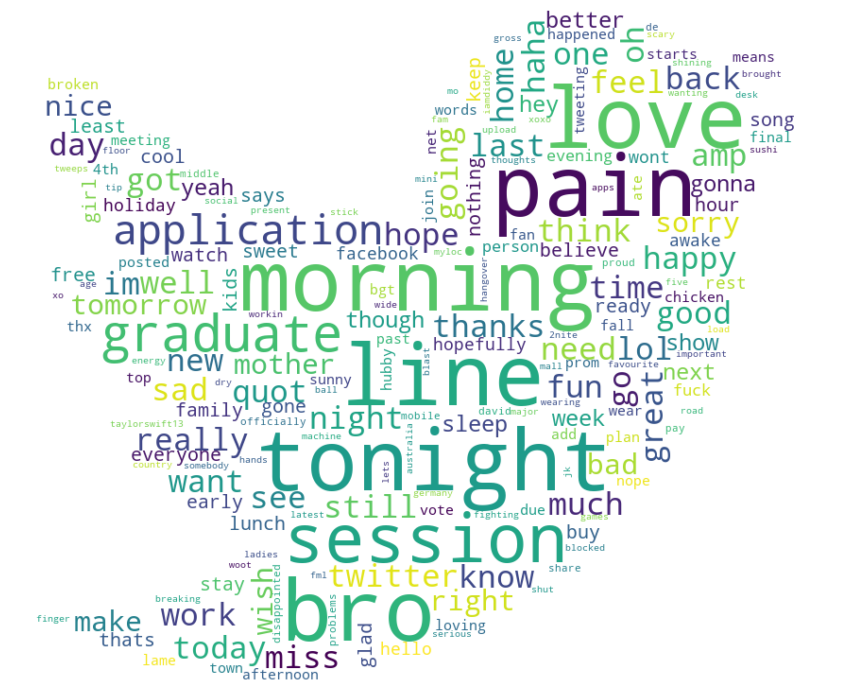

In [6]:
## Wordcloud avecun masque
from PIL import Image
x = subsample(labels, end=8000, step=10)

def plot_word_cloud(text, masque) :
    
    mask_coloring = np.array(Image.open(str(masque)))
    
    # Définir le calque du nuage des mots
    wc = WordCloud(width=600,
                   height=600,
                   background_color="white", 
                   max_words=200,  
                   mask = mask_coloring, 
                   max_font_size=90,
                   collocations = False, 
                   random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (15,20))
    wc.generate(" ".join(text))
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.show()


plot_word_cloud(x, './Img/oiseau_tweeter.png')

In [7]:
fig = go.Figure()
fig = go.Figure(data=[go.Histogram(x=dfw.sort_values(by=['Emotion'],ascending=False).Emotion, 
                                   name='words count'),], 
                      #go.Histogram(x=dfw.Emotion, cumulative_enabled=True, name='cumulative words count')],
               layout ={
                   'title':'Emotions Histogram',
                   'xaxis_title_text': 'Emotions',
                   'yaxis_title_text': 'Count',
               })

fig.show()

On observe une grande hétérogénéité entre les classes, notament boredom et anger qui sont sous-représentées (entre 100 et 200 entrées contre plus de 8000 pour certaines classes) dans le jeu de données. Il faudra surement effectuer un réequilibrage (échantillonnage différent) et il n'est pas évident que cela ait le résultat esconpté.

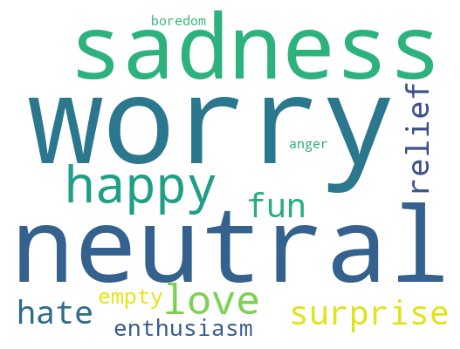

In [8]:
plt.subplots(figsize=(8,8))

x= subsample(dfw.Emotion,end=40000,step=80)
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384,
                      max_words = len(dfw.Emotion.unique())
                     ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wourdcloud.png')

plt.show()

## Test des modèles entreinnées dans la première partie sur le deuxième jeu de données

J'ai estimé que cette partie n'était pas pertinante sachant que plus de la moitié des classes ne sont pas représentées dans le 1er jeux de donné, il n'est donc pas possible de prédire une émotions que l'on n'a pas apprise en classification supervisée.

## Fit et résultats pour le second jeu de données

In [9]:
def run_pipes(pipes, splits, corpus, targets, test_size=0.2, seed=42):  
    res = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(corpus, targets):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = corpus[idx_train]
            X_test = corpus[idx_test]
            y_train = targets[idx_train]
            y_test = targets[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test)
            res[name].append([
                fit_time,
                f1_score(y_test, y, average='micro'),
                f1_score(y_test, y, average='macro'),
                f1_score(y_test, y, average='weighted'),           
                f1_score(y_test, y, labels = [1], average = None),           
                f1_score(y_test, y, labels = [2], average = None),           
                f1_score(y_test, y, labels = [3], average = None),           
                f1_score(y_test, y, labels = [4], average = None),           
                f1_score(y_test, y, labels = [5], average = None),           
                f1_score(y_test, y, labels = [6], average = None),
                f1_score(y_test, y, labels = [7], average = None),           
                f1_score(y_test, y, labels = [8], average = None),           
                f1_score(y_test, y, labels = [9], average = None),           
                f1_score(y_test, y, labels = [10], average = None),           
                f1_score(y_test, y, labels = [11], average = None),           
                f1_score(y_test, y, labels = [12], average = None),        
                f1_score(y_test, y, labels = [13], average = None),
            ])
    return res

In [10]:
def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time (s)" : arr[:, 0].mean(),#.round(2),
            "f1_av_micro": [arr[:,1].mean().round(3), arr[:,1].std().round(3)],
            "f1_av_macro": [arr[:,2].mean().round(3), arr[:,2].std().round(3)],
            "f1_av_weighted": [arr[:,3].mean().round(3), arr[:,3].std().round(3)],
            "f1_"+emotw[0]: [arr[:,4].mean().round(3), arr[:,4].std().round(3)],
            "f1_"+emotw[1]: [arr[:,5].mean().round(3), arr[:,5].std().round(3)],
            "f1_"+emotw[2]: [arr[:,6].mean().round(3), arr[:,6].std().round(3)],
            "f1_"+emotw[3]: [arr[:,7].mean().round(3), arr[:,7].std().round(3)],
            "f1_"+emotw[4]: [arr[:,8].mean().round(3), arr[:,8].std().round(3)],
            "f1_"+emotw[5]: [arr[:,9].mean().round(3), arr[:,9].std().round(3)],
            "f1_"+emotw[6]: [arr[:,10].mean().round(3), arr[:,10].std().round(3)],
            "f1_"+emotw[7]: [arr[:,11].mean().round(3), arr[:,11].std().round(3)],
            "f1_"+emotw[8]: [arr[:,12].mean().round(3), arr[:,12].std().round(3)],
            "f1_"+emotw[9]: [arr[:,13].mean().round(3), arr[:,13].std().round(3)],
            "f1_"+emotw[10]: [arr[:,14].mean().round(3), arr[:,14].std().round(3)],
            "f1_"+emotw[11]: [arr[:,15].mean().round(3), arr[:,15].std().round(3)],
            "f1_"+emotw[12]: [arr[:,16].mean().round(3), arr[:,16].std().round(3)],
        }

    df = pd.DataFrame.from_dict(final, orient="index").round(3)
    return df

In [11]:
(unique, counts) = np.unique(targetsw, return_counts=True)
frequencies = np.asarray((emotw[unique-1], counts)).T
print("fréquences après échantillonnage : ", frequencies)

fréquences après échantillonnage :  [['empty' 827]
 ['sadness' 5165]
 ['enthusiasm' 759]
 ['neutral' 8638]
 ['worry' 8459]
 ['surprise' 2187]
 ['love' 3842]
 ['fun' 1776]
 ['hate' 1323]
 ['happy' 5209]
 ['boredom' 179]
 ['relief' 1526]
 ['anger' 110]]


In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, sampling_strategy="majority") # 'majority', 'not minority', 'not majority', 'all', 'auto': équivalent à .'not minority'
corpusw_rsampl, targetsw_rsampl = rus.fit_resample(dfw.Text.values.reshape(-1, 1), targetsw)
corpusw_rsampl = pd.DataFrame(corpusw_rsampl, columns=['corpusw_rsampl']).corpusw_rsampl


(unique, counts) = np.unique(targetsw_rsampl, return_counts=True)
frequencies = np.asarray((emotw[unique-1], counts)).T
print("fréquences après échantillonnage : ", frequencies)

fréquences après échantillonnage :  [['empty' 827]
 ['sadness' 5165]
 ['enthusiasm' 759]
 ['neutral' 110]
 ['worry' 8459]
 ['surprise' 2187]
 ['love' 3842]
 ['fun' 1776]
 ['hate' 1323]
 ['happy' 5209]
 ['boredom' 179]
 ['relief' 1526]
 ['anger' 110]]


L'idée est de partir directement sur les classifieurs "customisés" dans la partie 1.

In [13]:
pipe25 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('sgd-weight_bal', SGDClassifier(max_iter = 2000, class_weight = 'balanced', penalty= 'elasticnet', loss = 'modified_huber')), 
])    
pipe26 = Pipeline([                     
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lin_svm-weight_bal', LinearSVC(class_weight = 'balanced', penalty='l1', loss = 'squared_hinge', dual=False)), 
])                                                                                                                  
pipe28 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lgr-weight_bal', LogisticRegression(max_iter = 2000, penalty = 'l1', solver='liblinear', class_weight = 'balanced')), 
])                                                                                      
pipe29 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('dtc-weight_bal', DecisionTreeClassifier(class_weight = 'balanced')),
])
pipe30 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('compl_nb-weight_bal', ComplementNB()),
])

res = run_pipes([pipe25, pipe26, pipe28, pipe29, pipe30], splits = 1, corpus=corpusw_rsampl, targets=targetsw_rsampl)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)   f1_av_micro   f1_av_macro  \
ngram_stop-tfidf-sgd-weight_bal          2.400  [0.283, 0.0]  [0.184, 0.0]   
ngram_stop-tfidf-lin_svm-weight_bal      7.824  [0.266, 0.0]  [0.172, 0.0]   
ngram_stop-tfidf-lgr-weight_bal          2.536  [0.288, 0.0]  [0.196, 0.0]   
ngram_stop-tfidf-dtc-weight_bal         23.477  [0.239, 0.0]   [0.15, 0.0]   
ngram_stop-tfidf-compl_nb-weight_bal     0.932  [0.339, 0.0]  [0.184, 0.0]   

                                     f1_av_weighted          f1_empty  \
ngram_stop-tfidf-sgd-weight_bal        [0.304, 0.0]  [[0.059], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal    [0.285, 0.0]  [[0.052], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal        [0.307, 0.0]  [[0.063], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal        [0.246, 0.0]  [[0.068], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal    [0.32, 0.0]  [[0.132], [0.0]]   

                                            f1_sadness     f1_enthusiasm  \
ngram_stop-tfidf-sgd-weight_bal       [[0.329], [0.0]]  [[0.059], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.314], [0.0]]  [[0.053], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal        [[0.31], [0.0]]   [[0.07], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.257], [0.0]]  [[0.045], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.319], [0.0]]   [[0.02], [0.0]]   

                                            f1_neutral          f1_worry  \
ngram_stop-tfidf-sgd-weight_bal         [[0.0], [0.0]]  [[0.372], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.018], [0.0]]  [[0.344], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.049], [0.0]]  [[0.376], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal         [[0.0], [0.0]]  [[0.312], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.095], [0.0]]  [[0.456], [0.0]]   

                                           f1_surprise           f1_love  \
ngram_stop-tfidf-sgd-weight_bal       [[0.139], [0.0]]  [[0.453], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.127], [0.0]]   [[0.43], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.155], [0.0]]  [[0.453], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.095], [0.0]]  [[0.339], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.088], [0.0]]  [[0.393], [0.0]]   

                                                f1_fun           f1_hate  \
ngram_stop-tfidf-sgd-weight_bal       [[0.166], [0.0]]  [[0.258], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.137], [0.0]]  [[0.243], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.183], [0.0]]  [[0.299], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.111], [0.0]]   [[0.27], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.106], [0.0]]  [[0.218], [0.0]]   

                                              f1_happy        f1_boredom  \
ngram_stop-tfidf-sgd-weight_bal       [[0.311], [0.0]]  [[0.082], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.297], [0.0]]  [[0.079], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.311], [0.0]]   [[0.12], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.263], [0.0]]  [[0.067], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.367], [0.0]]  [[0.065], [0.0]]   

                                             f1_relief        f1_anger  
ngram_stop-tfidf-sgd-weight_bal        [[0.16], [0.0]]  [[0.0], [0.0]]  
ngram_stop-tfidf-lin_svm-weight_bal   [[0.146], [0.0]]  [[0.0], [0.0]]  
ngram_stop-tfidf-lgr-weight_bal       [[0.164], [0.0]]  [[0.0], [0.0]]  
ngram_stop-tfidf-dtc-weight_bal       [[0.118], [0.0]]  [[0.0], [0.0]]  
ngram_stop-tfidf-compl_nb-weight_bal  [[0.132], [0.0]]  [[0.0], [0.0]]

Bon ok! Les performances sont loin de ce qu'on a obtenu sur le premier jeu de données. Les classes ayant les moins bon score sont : 
* neutral ( pas d'émotion particulière donc à mon sens pas de mots particuliers)
* empty ( émotion non renseigné, donc difficile de prédire !!!)
* boredom et anger (classes sous représenté et pourtant j'utilise un poid par classe dans le classifieur)
* Il y en a d'autre comme fun est relief qui sont des emotions plus subtiles (niveau 2 : en bas du circumplex en 3D).

## Netoyage des Données

Je vais commencer par enlever les tag et les url qui n'ont pas à mon sens d'interet (non porteur d'information) pour la prédiction d'une émotion. Les fonctions utilisés pour le nétoyage sont dans un fichier à part (**functions.py**)

In [14]:
import re

def nlp_pipeline(text):

    text = text.lower()

    # Transform short negation form
    text = text.replace(r"(can't|cannot)", 'can not')
    text = text.replace(r"n't", ' not')

    # Transform short is
    text = text.replace(r"'s", ' is') 

    # Remove stop words
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.remove('not')
    stopwords.remove('nor')
    stopwords.remove('no')

    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text) 
    text = re.sub(r'[a-z]*[:.]+\S+', "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"@[a-z0-9._-]+", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    return text


J'applique ces premières transformation sur le corpus

In [15]:

corpusw = dfw.Text
corpusw = corpusw.apply(nlp_pipeline)

In [16]:
pipe25 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('sgd-weight_bal', SGDClassifier(max_iter = 2000, class_weight = 'balanced', penalty= 'elasticnet', loss = 'modified_huber')), #penalty{‘l2’, ‘l1’, ‘elasticnet’}
])                          # loss  ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, or a regression loss: ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.
pipe26 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lin_svm-weight_bal', LinearSVC(class_weight = 'balanced', penalty='l1', loss = 'squared_hinge', dual=False)), # penalty{‘l1’, ‘l2’}: default : 'l2', loss{‘hinge’, ‘squared_hinge’} : default: 'square_hinge'
])                                                                                                                  # must : , penalty='l1', loss = 'squared_hinge', dual=False
pipe28 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lgr-weight_bal', LogisticRegression(max_iter = 2000, penalty = 'l1', solver='liblinear', class_weight = 'balanced')), # penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, dualbool, default=False
])                                                                                      # solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
pipe29 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('dtc-weight_bal', DecisionTreeClassifier(class_weight = 'balanced')),
])
pipe30 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('compl_nb-weight_bal', ComplementNB()),
])

res = run_pipes([pipe25, pipe26, pipe28, pipe29, pipe30], splits = 1, corpus=corpusw, targets=targetsw)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)   f1_av_micro   f1_av_macro  \
ngram_stop-tfidf-sgd-weight_bal          2.906  [0.246, 0.0]  [0.181, 0.0]   
ngram_stop-tfidf-lin_svm-weight_bal      7.049  [0.245, 0.0]  [0.172, 0.0]   
ngram_stop-tfidf-lgr-weight_bal          3.012  [0.273, 0.0]  [0.197, 0.0]   
ngram_stop-tfidf-dtc-weight_bal         31.816   [0.22, 0.0]  [0.152, 0.0]   
ngram_stop-tfidf-compl_nb-weight_bal     0.959  [0.296, 0.0]  [0.174, 0.0]   

                                     f1_av_weighted          f1_empty  \
ngram_stop-tfidf-sgd-weight_bal        [0.262, 0.0]   [[0.05], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal     [0.26, 0.0]  [[0.052], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal        [0.285, 0.0]  [[0.053], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal        [0.227, 0.0]  [[0.054], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal   [0.283, 0.0]  [[0.066], [0.0]]   

                                            f1_sadness     f1_enthusiasm  \
ngram_stop-tfidf-sgd-weight_bal       [[0.279], [0.0]]  [[0.043], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.268], [0.0]]  [[0.038], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.283], [0.0]]  [[0.048], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal        [[0.23], [0.0]]  [[0.022], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.276], [0.0]]   [[0.01], [0.0]]   

                                            f1_neutral          f1_worry  \
ngram_stop-tfidf-sgd-weight_bal       [[0.279], [0.0]]  [[0.277], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.308], [0.0]]  [[0.273], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.348], [0.0]]  [[0.278], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.263], [0.0]]  [[0.259], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.319], [0.0]]  [[0.371], [0.0]]   

                                           f1_surprise           f1_love  \
ngram_stop-tfidf-sgd-weight_bal       [[0.145], [0.0]]  [[0.432], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.135], [0.0]]  [[0.401], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.162], [0.0]]   [[0.45], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.116], [0.0]]  [[0.331], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.075], [0.0]]  [[0.411], [0.0]]   

                                                f1_fun           f1_hate  \
ngram_stop-tfidf-sgd-weight_bal       [[0.139], [0.0]]  [[0.243], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.119], [0.0]]  [[0.237], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.143], [0.0]]  [[0.287], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.125], [0.0]]  [[0.211], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.083], [0.0]]  [[0.232], [0.0]]   

                                              f1_happy        f1_boredom  \
ngram_stop-tfidf-sgd-weight_bal       [[0.264], [0.0]]  [[0.018], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.269], [0.0]]    [[0.0], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.286], [0.0]]  [[0.033], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.225], [0.0]]  [[0.035], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.311], [0.0]]    [[0.0], [0.0]]   

                                             f1_relief        f1_anger  
ngram_stop-tfidf-sgd-weight_bal       [[0.181], [0.0]]  [[0.0], [0.0]]  
ngram_stop-tfidf-lin_svm-weight_bal    [[0.14], [0.0]]  [[0.0], [0.0]]  
ngram_stop-tfidf-lgr-weight_bal        [[0.19], [0.0]]  [[0.0], [0.0]]  
ngram_stop-tfidf-dtc-weight_bal       [[0.109], [0.0]]  [[0.0], [0.0]]  
ngram_stop-tfidf-compl_nb-weight_bal  [[0.103], [0.0]]  [[0.0], [0.0]]

Perte de performance 
Je vais essayer de remplacer toute la chaine de pré-traitement et transformation des données par nltk

In [17]:
#### Définition des  fonctions utiles

In [18]:
def lowercasing(text):
    """ permet de convertir ma chaine en minuscules"""
    text = text.lower()
    return text

def transformnegationform(text):
    """Transform short negation form"""
    text = re.sub(r"(can't|cannot)", 'can not',text)
    text = re.sub(r"n't", 'not',text)
    text = re.sub(r"didnt",'did not',text)
    text = re.sub(r"im",'i am',text)
    text = re.sub(r"ive",' i have',text)
    return text

def normalize(text):
    """ Enlever les mots avec accents"""
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def removespecialcaracter(text): 
    text = re.sub(r'[a-z]*[:.]+\S+', "", text) 
    text = re.sub(r"@[a-z0-9._-]+", "", text)
    text = re.sub(r'\W', ' ', text) 
    text = re.sub(r"(http|ftp|https|@)", "", text) 

    # remove all single characters
    text= re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    return text

## Remove repetitions
def removerepetiotion(text):
    """ enleve la répétitions du caractère dans un mot """
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    text = pattern.sub(r"\1",text)
    pattern = re.compile(r"(ha)\1{2,}", re.DOTALL)
    text = pattern.sub(r"\1",text)
    return text

## stopwords
gist_file01 = open("./Stopwords/gist_stopwords01.txt", "r")
try:
    content = gist_file01.read()
    stopwords01 = content.split(",")
finally:
    gist_file01.close()
    
gist_file02 = open("./Stopwords/gist_stopwords02.txt", "r")
try:
    content = gist_file02.read()
    stopwords02 = content.split(",")
finally:
    gist_file02.close() 
    
stopwords = sw.words('english')

ens =set(stopwords)
ens1=set(stopwords01)
ens2=set(stopwords02)
ensf=ens|ens1|ens2
stopwordsf=list(ensf)

def splittext(text):
    """ découper le texte selon un seul espace"""
    text = [word for word in text.split() if word not in stopwordsf]
    return text

## lemmatisation
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
lemma_function = WordNetLemmatizer()

def lemmetize(text):
    text = [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(text)]
    return text

## stemmatisation
ps = PorterStemmer() 
ss = SnowballStemmer("english")
ls = LancasterStemmer(strip_prefix_flag=True)   
def stemize(text):
    text = [ls.stem(txt) for txt in text]
    return text

def removeduplicate(text):
    text = list(np.unique(text))
    return text

def numericremove(text):
    text = [word for word in text if word.isalpha()]
    return text

def removeshortword(text,n):
    text = [word for word in text if len(word)>n]
    return text

def buildngramscontinu(text,n):
    text=everygrams(text, max_len=n)
    return list(text)

In [19]:
lem = True
Stem = True
nb_gram = 2
def clean_text(text):
    global lem
    global stem 
    global nb_gram
    text=lowercasing(text)
    text=transformnegationform(text)
    text=normalize(text)
    text=removespecialcaracter(text)
    text=removerepetiotion(text)
    text=splittext(text)
    if lem==True:
        text=lemmetize(text)
    if stem==True:
        text=stemize(text)
    text=removeduplicate(text)
    text=numericremove(text)
    text=removeshortword(text,3) # mots plus petit que ...
    text=buildngramscontinu(text,nb_gram) # choix des n-grams
    return text

Les différentes opération sont dans l'ordre : mise en minuscule, traitement de la négation, normalisation, enlever les caractères spéciaux, les stopwords et les répétition de lettre dans les mots. Puis je split le texte, lematize, stemize, enlève les chiffres les mots de moins de 2 lettres et construit des n-grams.

### Test fit models avec ce pré- traitement du texte

In [21]:
pipe25 = Pipeline([
    ("ngram_stop", CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('sgd-weight_bal', SGDClassifier(max_iter = 2000, class_weight = 'balanced', penalty= 'elasticnet', loss = 'modified_huber')), 
])                        
pipe26 = Pipeline([
    ("ngram_stop", CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('lin_svm-weight_bal', LinearSVC(class_weight = 'balanced', penalty='l1', loss = 'squared_hinge', dual=False)),
])                                                                                                                  
pipe28 = Pipeline([
    ("ngram_stop", CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('lgr-weight_bal', LogisticRegression(max_iter = 2000, penalty = 'l1', solver='liblinear', class_weight = 'balanced')),
])                                                                                      
pipe29 = Pipeline([
    ("ngram_stop", CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('dtc-weight_bal', DecisionTreeClassifier(class_weight = 'balanced')),
])
pipe30 = Pipeline([
    ("ngram_stop", CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('compl_nb-weight_bal', ComplementNB()),
])

lem=True
stem=True
res = run_pipes([pipe25, pipe26, pipe28, pipe29, pipe30], splits = 1, corpus=corpusw, targets=targetsw)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)   f1_av_micro   f1_av_macro  \
ngram_stop-tfidf-sgd-weight_bal         34.444  [0.195, 0.0]  [0.131, 0.0]   
ngram_stop-tfidf-lin_svm-weight_bal     36.913  [0.221, 0.0]  [0.138, 0.0]   
ngram_stop-tfidf-lgr-weight_bal         39.312  [0.213, 0.0]  [0.142, 0.0]   
ngram_stop-tfidf-dtc-weight_bal         96.552  [0.166, 0.0]  [0.119, 0.0]   
ngram_stop-tfidf-compl_nb-weight_bal    33.905  [0.231, 0.0]  [0.126, 0.0]   

                                     f1_av_weighted          f1_empty  \
ngram_stop-tfidf-sgd-weight_bal         [0.21, 0.0]  [[0.025], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal    [0.226, 0.0]  [[0.021], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal        [0.219, 0.0]  [[0.025], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal        [0.181, 0.0]  [[0.048], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal   [0.224, 0.0]  [[0.046], [0.0]]   

                                            f1_sadness     f1_enthusiasm  \
ngram_stop-tfidf-sgd-weight_bal       [[0.179], [0.0]]  [[0.034], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.192], [0.0]]  [[0.057], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.173], [0.0]]  [[0.059], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.196], [0.0]]  [[0.055], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.203], [0.0]]   [[0.01], [0.0]]   

                                            f1_neutral          f1_worry  \
ngram_stop-tfidf-sgd-weight_bal       [[0.297], [0.0]]  [[0.241], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.329], [0.0]]  [[0.272], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.332], [0.0]]  [[0.228], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.197], [0.0]]  [[0.233], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.282], [0.0]]  [[0.329], [0.0]]   

                                           f1_surprise           f1_love  \
ngram_stop-tfidf-sgd-weight_bal       [[0.084], [0.0]]  [[0.262], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.086], [0.0]]  [[0.256], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal         [[0.1], [0.0]]  [[0.277], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.088], [0.0]]  [[0.228], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.051], [0.0]]   [[0.27], [0.0]]   

                                                f1_fun           f1_hate  \
ngram_stop-tfidf-sgd-weight_bal       [[0.087], [0.0]]  [[0.167], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal    [[0.08], [0.0]]  [[0.162], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.117], [0.0]]  [[0.194], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.078], [0.0]]  [[0.167], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.057], [0.0]]  [[0.116], [0.0]]   

                                              f1_happy        f1_boredom  \
ngram_stop-tfidf-sgd-weight_bal       [[0.211], [0.0]]  [[0.015], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.232], [0.0]]  [[0.009], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.211], [0.0]]  [[0.024], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.183], [0.0]]  [[0.012], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.234], [0.0]]    [[0.0], [0.0]]   

                                             f1_relief          f1_anger  
ngram_stop-tfidf-sgd-weight_bal       [[0.104], [0.0]]    [[0.0], [0.0]]  
ngram_stop-tfidf-lin_svm-weight_bal    [[0.08], [0.0]]  [[0.013], [0.0]]  
ngram_stop-tfidf-lgr-weight_bal       [[0.103], [0.0]]    [[0.0], [0.0]]  
ngram_stop-tfidf-dtc-weight_bal       [[0.058], [0.0]]    [[0.0], [0.0]]  
ngram_stop-tfidf-compl_nb-weight_bal  [[0.041], [0.0]]    [[0.0], [0.0]]

C'est toujours aussi mauvais!!! Du coup j'ai abendonné l'idée.<br>

Je souhaite réaliser un dernier test avant de passer au dataset complet en fusionnant (jointure) les deux datasets. En effet, je vais réduire la matrice sparce avant de modéliser

In [22]:
pipe1 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words= 'english', ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('truncSVD', TruncatedSVD(n_components=5, n_iter=7, random_state=42)),
    ('sgd-weight_bal', SGDClassifier(max_iter = 2000, class_weight = 'balanced', penalty= 'elasticnet', loss = 'modified_huber')), 
])                        
pipe2 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words= 'english', ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('truncSVD', TruncatedSVD(n_components=5, n_iter=7, random_state=42)),
    ('lin_svm-weight_bal', LinearSVC(class_weight = 'balanced', penalty='l1', loss = 'squared_hinge', dual=False)),
])                                                                                                                  
pipe3 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words= 'english', ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('truncSVD', TruncatedSVD(n_components=5, n_iter=7, random_state=42)),
    ('lgr-weight_bal', LogisticRegression(max_iter = 2000, penalty = 'l1', solver='liblinear', class_weight = 'balanced')),
])                                                                                      
pipe4 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words= 'english', ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('truncSVD', TruncatedSVD(n_components=5, n_iter=7, random_state=42)),
    ('dtc-weight_bal', DecisionTreeClassifier(class_weight = 'balanced')),
])

res = run_pipes([pipe1, pipe2, pipe3, pipe4], splits = 1, corpus=corpusw, targets=targetsw)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)   f1_av_micro  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal         2.885  [0.123, 0.0]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal     2.090  [0.236, 0.0]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal         1.962   [0.25, 0.0]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal         1.727  [0.171, 0.0]   

                                               f1_av_macro f1_av_weighted  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal       [0.06, 0.0]    [0.11, 0.0]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal  [0.088, 0.0]    [0.19, 0.0]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal      [0.092, 0.0]   [0.199, 0.0]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal      [0.105, 0.0]   [0.174, 0.0]   

                                                      f1_empty  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal        [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal    [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal        [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal      [[0.038], [0.0]]   

                                                    f1_sadness  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal        [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal  [[0.025], [0.0]]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal      [[0.063], [0.0]]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal      [[0.159], [0.0]]   

                                                 f1_enthusiasm  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal      [[0.022], [0.0]]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal    [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal        [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal      [[0.042], [0.0]]   

                                                    f1_neutral  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal      [[0.305], [0.0]]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal  [[0.367], [0.0]]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal      [[0.367], [0.0]]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal      [[0.204], [0.0]]   

                                                      f1_worry  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal        [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal  [[0.262], [0.0]]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal      [[0.289], [0.0]]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal      [[0.235], [0.0]]   

                                                   f1_surprise  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal        [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal    [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal        [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal      [[0.055], [0.0]]   

                                                       f1_love  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal       [[0.23], [0.0]]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal  [[0.295], [0.0]]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal      [[0.286], [0.0]]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal      [[0.264], [0.0]]   

                                                        f1_fun  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal      [[0.091], [0.0]]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal    [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal        [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal      [[0.061], [0.0]]   

                                                       f1_hate  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal        [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal    [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal        [[0.0], [0.0]]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal      [[0.073], [0.0]]   

                                                      f1_happy  \
ngram_stop-tfidf-truncSVD-sgd-weight_bal      [[0.136], [0.0]]   
ngram_stop-tfidf-truncSVD-lin_svm-weight_bal  [[0.187], [0.0]]   
ngram_stop-tfidf-truncSVD-lgr-weight_bal      [[0.182], [0.0]]   
ngram_stop-tfidf-truncSVD-dtc-weight_bal      [[0.175], 

Pas de gain non plus, au contraire il y a maintenant pas mal de classes qui ne sont plus prédite. <br>
Dans ce jeu de donnée, je ne vois pas comment améliorer les prédiction sans réduire le nombre de classe à prédire en ce concentrant sur celle qui donne des meilleur résultats car elle sont très différente en terme de scémentique ( ex : joie et tristesse, peur et colère. Un peu ce qu'on avais dans le premier jeu).

Il me reste peux de temps car je veux me concentrer sur le dashbord (partie Dataviz ou je dois beaucoup apprendre), donc je vais réaliser quelques test sur le jeu de donné augmenté

## DataFrame contenant les deux Dataset

In [26]:
dfw = pd.read_csv("./Datas/text_emotion.csv") 
dfw.columns = ["Tweet_id", "Emotion", "Author", "Text"]
dfw =dfw.drop(columns='Tweet_id')
dfw =dfw.drop(columns='Author')
dfw.loc[dfw.Emotion =='happiness', 'Emotion'] = 'happy'
dfk = pd.read_csv("./Datas/Emotion_final.csv")

dfw = pd.concat([dfk, dfw], join="inner")
del dfk
dfw.reset_index(drop=True, inplace=True)

In [27]:
corpusw = dfw.Text
targetsw = dfw.Emotion
emotw = dfw.Emotion.unique()
targetsw = np.array([1 if x == emotw[0] else 2 if x==emotw[1] else 3 if x==emotw[2] else 4 if x==emotw[3] else 5 if x==emotw[4] else 6 if x==emotw[5] else 7 if x==emotw[6] else 8 if x==emotw[7] else 9 if x==emotw[8] else 10 if x==emotw[9] else 11 if x==emotw[10] else 12 if x==emotw[11] else 13 if x==emotw[12] else 14 for x in targetsw])

Je sais qu'il y a plus simple pour changer les labels avec sklearn label encoder mais je n'ai pas voulu changer au dernier moment de peur de tout casser.

In [28]:
# Vobabulary analysis
vect = CountVectorizer(stop_words=stopwords)
X = vect.fit_transform(corpusw)
words = vect.get_feature_names()

print("vocabulary size: %d words" % len(words) )

# Compute rank
wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

# Sub-sample the data to plot. take the 50 first + the rest sample with the given step 
def subsample(x, end, step):
    return np.hstack((x[:60], x[60:end:step]))


plt.figure(figsize=(20,8))
freq = subsample(wrank,end=60,step=800)
r = np.arange(len(freq))

vocabulary size: 56986 words


<Figure size 1440x576 with 0 Axes>

In [29]:
trace = go.Bar(
                x = subsample(labels,end=80,step=800),
                y = freq,
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
)

layout = go.Layout(title = "Words ordered by rank. The first rank is the most frequent words and the last one is the less present",
                   xaxis_title_text = 'Word rank',
                   yaxis_title_text = 'word frequency',)

fig = go.Figure(data = trace, layout = layout)
fig.show()

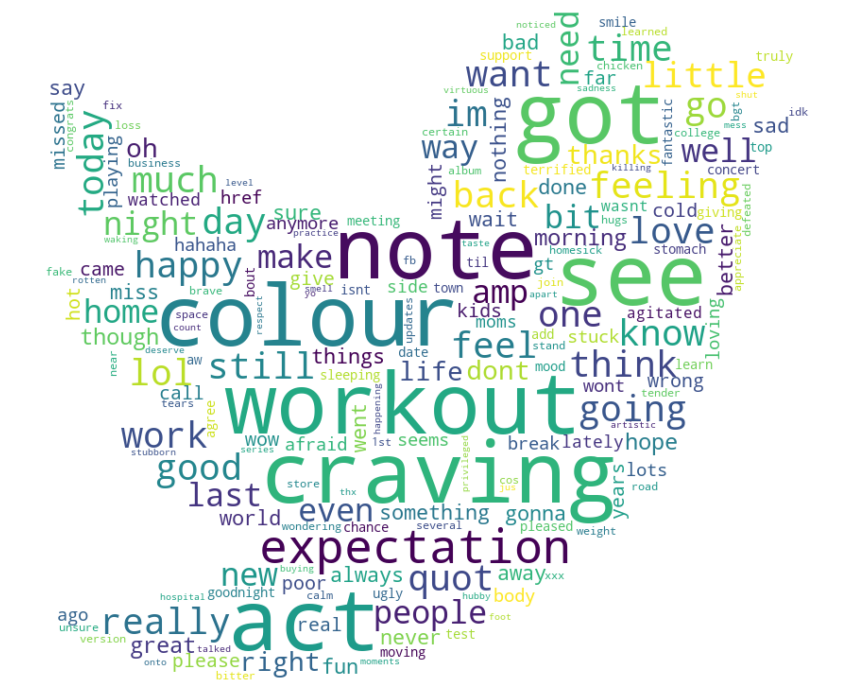

In [31]:
## Wordcloud avecun masque
from PIL import Image
# librairie word cloud
from wordcloud import WordCloud
x = subsample(labels, end=8000, step=10)

def plot_word_cloud(text, masque) :
    
    mask_coloring = np.array(Image.open(str(masque)))
    
    # Définir le calque du nuage des mots
    wc = WordCloud(width=600,
                   height=600,
                   background_color="white", 
                   max_words=200,  
                   mask = mask_coloring, 
                   max_font_size=90,
                   collocations = False, 
                   random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (15,20))
    wc.generate(" ".join(text))
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.show()


plot_word_cloud(x, './Img/oiseau_tweeter.png')

In [32]:
fig = go.Figure()
fig = go.Figure(data=[go.Histogram(x=dfw.Emotion, name='words count'),], 
                      #go.Histogram(x=dfw.Emotion, cumulative_enabled=True, name='cumulative words count')],
               layout ={
                   'title':'Emotions Histogram',
                   'xaxis_title_text': 'Emotions',
                   'yaxis_title_text': 'Count',
               })

fig.show()

On augmente la taille du dataset donc la représentation de certaine classe par contre on observe toujours une grande hétérogénéité entre les classes, notament boredom et anger qui sont sous-représentées dans le jeu de données. Il faudra surement effectuer un réequilibrage ( échantillonnage différent).

### Fit et prediction avec pré-traitement Nltk

In [33]:
pipe25 = Pipeline([
    ("ngram_stop", CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('sgd-weight_bal', SGDClassifier(max_iter = 2000, class_weight = 'balanced', penalty= 'elasticnet', loss = 'modified_huber')), 
])                        
pipe26 = Pipeline([
    ("ngram_stop", CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('lin_svm-weight_bal', LinearSVC(class_weight = 'balanced', penalty='l1', loss = 'squared_hinge', dual=False)),
])                                                                                                                  
pipe28 = Pipeline([
    ("ngram_stop", CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('lgr-weight_bal', LogisticRegression(max_iter = 2000, penalty = 'l1', solver='liblinear', class_weight = 'balanced')),
])                                                                                      
pipe29 = Pipeline([
    ("ngram_stop", CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('dtc-weight_bal', DecisionTreeClassifier(class_weight = 'balanced')),
])
pipe30 = Pipeline([
    ("ngram_stop", CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('compl_nb-weight_bal', ComplementNB()),
])

lem=True
stem=True
nb_gram = 1
res = run_pipes([pipe25, pipe26, pipe28, pipe29, pipe30], splits = 1, corpus=corpusw, targets=targetsw)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)   f1_av_micro   f1_av_macro  \
ngram_stop-tfidf-sgd-weight_bal         63.857  [0.365, 0.0]  [0.283, 0.0]   
ngram_stop-tfidf-lin_svm-weight_bal     64.811  [0.367, 0.0]   [0.28, 0.0]   
ngram_stop-tfidf-lgr-weight_bal         62.134  [0.389, 0.0]  [0.298, 0.0]   
ngram_stop-tfidf-dtc-weight_bal         86.073  [0.353, 0.0]  [0.275, 0.0]   
ngram_stop-tfidf-compl_nb-weight_bal    58.702  [0.401, 0.0]  [0.258, 0.0]   

                                     f1_av_weighted        f1_sadness  \
ngram_stop-tfidf-sgd-weight_bal        [0.396, 0.0]  [[0.536], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal    [0.395, 0.0]  [[0.534], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal        [0.416, 0.0]  [[0.544], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal        [0.371, 0.0]  [[0.484], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal    [0.38, 0.0]  [[0.481], [0.0]]   

                                              f1_anger           f1_love  \
ngram_stop-tfidf-sgd-weight_bal       [[0.635], [0.0]]  [[0.359], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal    [[0.63], [0.0]]  [[0.347], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.682], [0.0]]  [[0.368], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal        [[0.69], [0.0]]  [[0.337], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.615], [0.0]]  [[0.343], [0.0]]   

                                           f1_surprise           f1_fear  \
ngram_stop-tfidf-sgd-weight_bal       [[0.268], [0.0]]  [[0.698], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.264], [0.0]]  [[0.685], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.279], [0.0]]  [[0.706], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal        [[0.25], [0.0]]  [[0.737], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.237], [0.0]]  [[0.662], [0.0]]   

                                              f1_happy          f1_empty  \
ngram_stop-tfidf-sgd-weight_bal       [[0.556], [0.0]]  [[0.023], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.547], [0.0]]  [[0.028], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.566], [0.0]]  [[0.033], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal         [[0.5], [0.0]]  [[0.055], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.535], [0.0]]    [[0.0], [0.0]]   

                                         f1_enthusiasm        f1_neutral  \
ngram_stop-tfidf-sgd-weight_bal       [[0.048], [0.0]]  [[0.294], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.045], [0.0]]  [[0.302], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.046], [0.0]]  [[0.337], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.035], [0.0]]  [[0.219], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal    [[0.0], [0.0]]  [[0.256], [0.0]]   

                                              f1_worry            f1_fun  \
ngram_stop-tfidf-sgd-weight_bal        [[0.21], [0.0]]  [[0.111], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.232], [0.0]]  [[0.096], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.259], [0.0]]  [[0.103], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.251], [0.0]]  [[0.071], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.316], [0.0]]  [[0.038], [0.0]]   

                                               f1_hate        f1_boredom  
ngram_stop-tfidf-sgd-weight_bal       [[0.136], [0.0]]  [[0.017], [0.0]]  
ngram_stop-tfidf-lin_svm-weight_bal   [[0.124], [0.0]]  [[0.014], [0.0]]  
ngram_stop-tfidf-lgr-weight_bal       [[0.158], [0.0]]  [[0.007], [0.0]]  
ngram_stop-tfidf-dtc-weight_bal       [[0.156], [0.0]]    [[0.0], [0.0]]  
ngram_stop-tfidf-compl_nb-weight_bal   [[0.11], [0.0]]    [[0.0], [0.0]]

### Fit et prediction avec pré-traitement sklearn

In [34]:
pipe25 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('sgd-weight_bal', SGDClassifier(max_iter = 2000, class_weight = 'balanced', penalty= 'elasticnet', loss = 'modified_huber')), 
])                        
pipe26 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('lin_svm-weight_bal', LinearSVC(class_weight = 'balanced', penalty='l1', loss = 'squared_hinge', dual=False)),
])                                                                                                                  
pipe28 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('lgr-weight_bal', LogisticRegression(max_iter = 2000, penalty = 'l1', solver='liblinear', class_weight = 'balanced')),
])                                                                                      
pipe29 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('dtc-weight_bal', DecisionTreeClassifier(class_weight = 'balanced')),
])
pipe30 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('compl_nb-weight_bal', ComplementNB()),
])

lem=True
stem=True
nb_gram = 1
res = run_pipes([pipe25, pipe26, pipe28, pipe29, pipe30], splits = 1, corpus=corpusw, targets=targetsw)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)   f1_av_micro   f1_av_macro  \
ngram_stop-tfidf-sgd-weight_bal          3.800  [0.466, 0.0]  [0.366, 0.0]   
ngram_stop-tfidf-lin_svm-weight_bal     11.221  [0.479, 0.0]  [0.357, 0.0]   
ngram_stop-tfidf-lgr-weight_bal          4.591  [0.478, 0.0]  [0.371, 0.0]   
ngram_stop-tfidf-dtc-weight_bal         65.639  [0.427, 0.0]  [0.327, 0.0]   
ngram_stop-tfidf-compl_nb-weight_bal     1.142  [0.466, 0.0]  [0.299, 0.0]   

                                     f1_av_weighted        f1_sadness  \
ngram_stop-tfidf-sgd-weight_bal        [0.496, 0.0]  [[0.659], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal    [0.493, 0.0]  [[0.654], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal        [0.502, 0.0]  [[0.658], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal        [0.437, 0.0]   [[0.55], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal   [0.438, 0.0]  [[0.591], [0.0]]   

                                              f1_anger           f1_love  \
ngram_stop-tfidf-sgd-weight_bal       [[0.799], [0.0]]  [[0.545], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.802], [0.0]]  [[0.513], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal        [[0.81], [0.0]]  [[0.551], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.803], [0.0]]  [[0.452], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.753], [0.0]]  [[0.452], [0.0]]   

                                           f1_surprise           f1_fear  \
ngram_stop-tfidf-sgd-weight_bal       [[0.318], [0.0]]  [[0.834], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.312], [0.0]]  [[0.832], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.318], [0.0]]  [[0.844], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.303], [0.0]]   [[0.82], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.276], [0.0]]   [[0.77], [0.0]]   

                                              f1_happy          f1_empty  \
ngram_stop-tfidf-sgd-weight_bal       [[0.658], [0.0]]  [[0.061], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.657], [0.0]]  [[0.045], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.653], [0.0]]  [[0.071], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.574], [0.0]]  [[0.058], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.599], [0.0]]    [[0.0], [0.0]]   

                                         f1_enthusiasm        f1_neutral  \
ngram_stop-tfidf-sgd-weight_bal       [[0.051], [0.0]]  [[0.342], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.027], [0.0]]  [[0.363], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.026], [0.0]]  [[0.377], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.011], [0.0]]  [[0.293], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal    [[0.0], [0.0]]  [[0.278], [0.0]]   

                                              f1_worry            f1_fun  \
ngram_stop-tfidf-sgd-weight_bal       [[0.298], [0.0]]  [[0.144], [0.0]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.304], [0.0]]  [[0.117], [0.0]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.297], [0.0]]  [[0.153], [0.0]]   
ngram_stop-tfidf-dtc-weight_bal        [[0.28], [0.0]]  [[0.085], [0.0]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.311], [0.0]]  [[0.031], [0.0]]   

                                               f1_hate        f1_boredom  
ngram_stop-tfidf-sgd-weight_bal       [[0.236], [0.0]]   [[0.04], [0.0]]  
ngram_stop-tfidf-lin_svm-weight_bal   [[0.237], [0.0]]  [[0.032], [0.0]]  
ngram_stop-tfidf-lgr-weight_bal       [[0.263], [0.0]]  [[0.032], [0.0]]  
ngram_stop-tfidf-dtc-weight_bal       [[0.221], [0.0]]  [[0.041], [0.0]]  
ngram_stop-tfidf-compl_nb-weight_bal  [[0.116], [0.0]]    [[0.0], [0.0]]

Dans les deux cas on abtient des résultats similaire, environ 50% de f1 score. C'est mieux qu'avec le 2ème jeu uniquement mais on est loin des scores sur le premier jeu. J'ai l'impression qu'avec le jeu complet on arrive bien à prédire les phrases du 1er jeu et mal celle du 2ème donc en moyenne 50%. <br><br>


L'avantage est d'augmenter le jeu de donné donc d'enrichir l'ensemble des mots utiles à prédire telle ou telle classe. <br><br>

Le 2ème dataset est sans doute plus proche de la problématique réelle ou l'on souhaite prédire des émotion, qui sont parfois proche et où le ressenti pour un être humain pourrait être différent d'une personne à l'autre.
Alors que le dataset 1 est plus un cas d'école. <br><br>

Je suis assez décu de n'avoir pu réaliser plus de test et améliorer les prédiction sur le jeu complet ( en réduissant la dimension des variable par exemple avec un critère chi2 ou autre) mais j'ai préféré me concentrer sur le dashbord pour aquérir ces compétences.<br><br>

Le sujet était très interessant, merci pour ce brief!
